# X (Twitter) Sentiment Analyis for Top Airlines in the USA

### Group 8 - Aviators. Members:

1. Joseph Kinuthia (Group leader)
2. Emily Owiti
3. James Mungai
4. Paul Muriithi
5. Raphael Kariuki
6. Sylvia Muchiri

# 1.0 Overview

In this project, we focus on leveraging Natural Language Processing (NLP) techniques to analyze sentiments expressed in a Twitter dataset, specifically within the airline industry domain. The primary objectives include sentiment analysis, the construction of a precise tweet classification model, and the development of a chatbot capable of responding to customer feedback and directing queries to the appropriate resolution teams. By accomplishing these goals, we will create solutions that enable airline companies to extract valuable insights from social media data which will play a big role in enhancing their customer service, improving their service offering and empowering these organizations to make data-driven decisions.

# 1.1 Problem statement

The advent of social media has generated an abundance of data, presenting both opportunities and challenges for organizations. This vast pool of data offers unparalleled insights into customer perceptions, preferences, and feedback. However, many organizations are yet to develop frameworks and strategies to effectively analyze and interpret such data. Insights from this data holds the potential to benefit various domains, including business operations, marketing strategies, public opinion analysis, and more.

Our stakeholders (top American airline companies) have requested us to analyze social media raw data and showcase the customer sentiment as either positive, neutral or negative while identifying the top drivers for these sentiments.

Our dataset is sourced from Twitter, capturing a wide array of tweets, and our primary focus is analyzing and visualizing drivers for key & top public & customer sentiment. We aim to address critical questions and challenges faced by airlines, such as understanding passenger sentiments from unstructured data and predicting engagement metrics. By doing so, we strive to provide airlines with the tools and knowledge needed to enhance customer experiences, optimize operations, and make data-driven decisions in an ever-evolving and competitive industry.

# 1.2 Business understanding

Our dataset includes data for the top 5 airline companies in the USA and these are our primary stakeholders for the project. The key players are United Airlines, US Airways, American Airlines, Delta Airlines and Southwest Airlines.

Below we discuss the general trends and factors that are common in the global airline industry.

The global airline industry is a vital sector that provides air transport services for passengers and cargo. It plays a crucial role in connecting people, businesses, and regions across the world. The industry comprises a diverse range of airlines, including full-service carriers, low-cost carriers (LCCs), regional airlines, and charter airlines. Major players are often categorized into international, national, and regional carriers, each serving specific markets.

### Global airline industry trends:

The trends below were useful in developing our understanding and hence optimal analysis our dataset.

1. Digital transformation and technology adoption:
While late adopters, airlines are increasingly leveraging technology to enhance operational efficiency, customer experiences, and overall service quality. This includes implementing mobile apps, self-service kiosks, AI-powered chatbots, and data analytics for personalized marketing and improved decision-making.

2. Sustainable and environmentally friendly practices:
Environmental sustainability has become a significant focus within the industry. Airlines are investing in more fuel-efficient aircraft, exploring biofuels, and implementing eco-friendly practices to reduce carbon emissions and mitigate their environmental impact.

3. Demand for personalized travel experiences:
Travelers now seek personalized experiences, leading to a shift in airline strategies. Airlines are customizing services, offering ancillary products, and tailoring loyalty programs to meet individual preferences and needs.

4. Partnerships and alliances:
Collaborations, partnerships, and alliances among airlines have become prevalent. These agreements help airlines expand their networks, improve cost-efficiency, and offer travelers more seamless travel options.

5. Health and safety measures post-pandemic:
The COVID-19 pandemic has significantly impacted the industry. Airlines are implementing stringent health and safety protocols to regain traveler confidence. Measures include enhanced cleaning procedures, health screenings, and contactless processes.

### Airline industry profit margins

The net profit margin for airlines is highly influenced by market conditions, fuel prices, operational efficiency, competition, and economic trends. On average, net profit margins for airlines typically range from 2% to 5%. However, it's important to note that individual airline net profit margins may fluctuate, and some airlines may experience periods of losses due to various factors affecting the industry. Airlines with a positive brand tend to have lower customer churn and in return higher pricing and higher revenues.

# 1.3 Project objectives

### 1.3.1 Main objective
1. Sentiment analysis and chatbot development
2. Come up with a solution to analyze raw tweets to extract the public sentiment ******** review this *****



### 1.3.2 Specific objectives
1. Analyze the data & derive the public's sentiment (positive, neutral or negative) for our client
2. Build a model that can classify raw tweets into the three sentiment classes for future use
3. Visualize the top drivers for each sentiment category to help management target service delivery improvement
4. Create a chatbot to monitor customer feedback on X that provides realtime responses to customers

# 1.4 Research questions

The project will be answer the below research questions:
1. What are the predominant sentiments expressed by passengers on X regarding major U.S. airlines?
2. What are the most common reasons for positive, neutral and negative sentiments among airline passengers, as expressed in their tweets?
3. Are there specific times of the year when sentiment toward airlines is more positive or negative?
4. How does the sentiment compare between the various airlines in our dataset (highest positive, negative, neutral)?

# 1.5 Data overview

Our dataset was publicly sourced from crowdflower website and is made up of Twitter users' tweets and retweets.
The dataset has 14,640 rows and 20 columns.
This Twitter data was collected from February 2015 and contributors were engaged in classifying tweets into categories of positive, negative, and neutral sentiments. Additionally, contributors were tasked with categorizing the reasons behind negative sentiments, such as "late flight" or "rude service."

This dataset serves as the foundation for our analysis, enabling us to gain insights into passenger & general public sentiments, engagement patterns, and other trends within the US airline industry.

[Link to the Data Source](https://data.world/crowdflower/airline-twitter-sentiment/) 

# 1.6 Project approach

1. Exploratory data analysis & data cleaning (including categorical variable encoding, feature engineering)
2. Data preprocessing for NLP (preparing text for sentiment scoring)
3. Data labelling & determining labelling accuracy
3. Sentiment analysis
4. Visualization of sentiment analysis outcomes
5. Prediction model building & validation
6. Chatbot development
7. Prediction model & chatbot deployment


Our project objectives are as follows:
1. Data Acquisition and Exploration:

* We will begin by importing and loading the new dataset into our data analysis environment (e.g., Python using pandas).
* Conduct an initial exploration of the data to understand its structure, column names, and data types.
* Check for missing values and handle them appropriately through imputation or removal.

2. Data Preprocessing:

* Preprocess the data to prepare it for analysis. This includes tasks such as cleaning text data, encoding categorical variables, and feature engineering.
For sentiment analysis, prepare the "text" column for sentiment scoring using NLP techniques or pre-trained sentiment analysis models.

3. Sentiment Analysis:
 
* To address the first objective of determining the overall sentiment distribution in the tweets, we will perform sentiment analysis on the "text" column using Natural Language Processing (NLP) techniques or pre-trained sentiment analysis models. These methods will categorize tweets into positive, negative, or neutral sentiment categories for validation or additional insights.
* Visualize the sentiment distribution using bar charts or pie charts to illustrate the prevalence of each sentiment category in the dataset. For instance, we will analyze whether sentiment tends to be more positive on certain days or during specific hours.
  
4. Location Analysis:

* Investigate correlations between language, geographical location, and sentiment using statistical tests and visualizations.
* Discover regional sentiment patterns by grouping the data by geographical location and visualizing regional sentiment variations.

5. Engagement Prediction:


* We will build an effective predictive model for estimating the number of retweets and likes using machine learning techniques. There is a need to preprocess the "text" column to extract relevant features, perform text vectorization (e.g., TF-IDF or word embeddings), and incorporate user-related features from the dataset.
* Split the dataset into training and testing sets, and train regression models such as Logistic Regression, Random Forest, or Gradient Boosting to predict tweet engagement metrics.
  
* After developing the predictive model, assess the feature importance to identify which specific features contribute the most to the prediction of tweet engagement (e.g., content-related features, user-related features).
* Visualize the feature importance scores using bar charts or feature importance plots to highlight the influential factors.


## Modeling

For engagement prediction, we will build predictive models using the following steps:

**Data Splitting:**
   - Split the dataset into training and testing sets to evaluate model performance. We will also use a validation set (or cross-validation) in addition to a training set is to fine-tune model hyperparameters, assess model performance on unseen data, and avoid overfitting. 

**Regression Models:**
   - Train and evaluate various regression models, including but not limited to:
     - Logistic Regression
     - Random Forest Regression
     - Gradient Boosting Regression
     - Support Vector Regression
     - Neural Network Regression 

**Model Evaluation:**
   - Evaluate the performance of each model using appropriate metrics such as:
     - Mean Absolute Error (MAE)
      By noting the average absolute error between the predicted engagement metrics (e.g., retweets   or likes) and the actual engagement metrics, we can have a straightforward measure of how far off our predictions are on average.

     - Root Mean Square Error (RMSE): Lower RMSE values indicate better performance.
  
     - R-squared (R2) for goodness of fit
      A higher R2 indicates a better fit, meaning that our features are better at explaining the variance in engagement.

     - Cross-validation to assess model generalization
      cross-validation scores (e.g., cross-validated MAE, RMSE, or R2) to assess how well your model generalizes to unseen data.

     - Additional Metrics:
      While these metrics provide valuable insights into our model's performance, it's essential to consider the accuracy of our sentiment analysis models as a fundamental measure. Accuracy measures the overall correctness of our model's predictions in classifying tweets into sentiment categories: positive, negative, or neutral.

      For a deployable model, we aim to achieve an accuracy score within the range of 90% to 95%. This level of accuracy signifies a high degree of correctness in our predictions and is a strong indicator of the model's reliability in real-world applications.

      Also we will consider other metrics, such as precision, recall, or F1-score, to evaluate the model's performance in more detail. 

**Hyperparameter Tuning:**
   - Fine-tune the hyperparameters of the best-performing models using techniques like grid search or random search.

**Ensemble Modeling:**
   - Consider ensemble methods such as stacking or bagging to improve predictive accuracy.

**Model Selection:**
   - Select the model(s) that demonstrate the best performance on the evaluation metrics.


## Chatbot Development
* It will deploy NLP Factors into it to Create separate response templates or messages for positive, negative, and neutral sentiments. These can be predefined messages or more dynamic responses generated by the chatbot. Sentiment-Based Routing:

* Develop a logic for routing tweets to the appropriate response based on their sentiment. You can use if-else conditions or switch statements for this purpose.
  
* For example, if a tweet is classified as "positive," the chatbot responds with a message designed to encourage positive sentiment, while a "negative" tweet may receive a message that expresses empathy and offers assistance. For "neutral" tweets, you can provide a generic acknowledgment.

## Natural Language Understanding (NLU)

* Implement natural language understanding to extract key information or context from user tweets. This can help the chatbot provide more relevant and personalized responses.
* Use NLU to understand the user's request or sentiment more deeply. For instance, if a user expresses frustration about a delayed flight, the chatbot can identify the issue and respond accordingly.

### Testing and Training 

* Train your chatbot using your predefined response templates and a diverse set of sample tweets to ensure it responds appropriately to different expressions of sentiment.
  
* Test the chatbot rigorously to identify and correct any issues or inaccuracies in sentiment classification and response generation.

### Integration with User Interface

* Integrate the chatbot into our API and user interface, whether it's a web application.
* Implement a user-friendly interface for users to input their tweets or questions to the chatbot.

### Scale and Deploy

Once you are satisfied with the chatbot's performance, deploy it ensuring it can handle large volumes of data.

* For model deployment, we've chosen to employ Pickle due to its simplicity and efficiency. Once our NLP data science project is complete and our models are trained, we'll serialize these models into Pickle files. 
  
* This serialization process ensures that the models can be easily transferred and loaded into production environments. With Pickle, making predictions on new data becomes a straightforward task, allowing for seamless integration into the airline company's operations.

## Scaling for Other Airlines:
* Our project isn't limited to just one airline; it can be readily scaled for use by multiple airlines. This scalability stems from the project's customization capabilities. Each airline can tailor the sentiment analysis and engagement prediction models to suit their unique brand and customer base, ensuring that insights generated are highly relevant. 
  
* Airlines can integrate their own customer feedback and social media data into the project, thus benefiting from the same advanced sentiment analysis and engagement prediction features. This collaborative approach promotes industry-wide improvements in customer engagement and satisfaction.


# 2.0 Exploratory data analysis 

In [1]:
## Step 1: Importing Necessary Libraries
# data manipulation and analysis
import pandas as pd
import numpy as np
from collections import defaultdict

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Natural language processing (NLP)
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, regexp_tokenize, RegexpTokenizer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV

# Deep learning imports 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


# Set the style for data visualization
sns.set(style='darkgrid')

In [2]:
import pandas as pd


In [3]:
data = pd.read_csv("Airline-Sentiment-2-w-AA.csv", encoding='latin 1')

In [4]:
data.head()


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _unit_id                      14640 non-null  int64  
 1   _golden                       14640 non-null  bool   
 2   _unit_state                   14640 non-null  object 
 3   _trusted_judgments            14640 non-null  int64  
 4   _last_judgment_at             14584 non-null  object 
 5   airline_sentiment             14640 non-null  object 
 6   airline_sentiment:confidence  14640 non-null  float64
 7   negativereason                9178 non-null   object 
 8   negativereason:confidence     10522 non-null  float64
 9   airline                       14640 non-null  object 
 10  airline_sentiment_gold        40 non-null     object 
 11  name                          14640 non-null  object 
 12  negativereason_gold           32 non-null     object 
 13  r

In [6]:
data.describe()

,_unit_id,_trusted_judgments,airline_sentiment:confidence,negativereason:confidence,retweet_count,tweet_id
count,1.464000e+04,14640.000000,14640.000000,10522.000000,14640.000000,1.464000e+04
mean,6.814957e+08,3.618648,0.900169,0.638298,0.082650,5.692184e+17
std,8.504314e+04,11.858704,0.162830,0.330440,0.745778,7.791092e+14
min,6.814482e+08,2.000000,0.335000,0.000000,0.000000,5.675880e+17
25%,6.814536e+08,3.000000,0.692300,0.360600,0.000000,5.685590e+17
50%,6.814578e+08,3.000000,1.000000,0.670600,0.000000,5.694780e+17
75%,6.814623e+08,3.000000,1.000000,1.000000,0.000000,5.698902e+17
max,6.816798e+08,248.000000,1.000000,1.000000,44.000000,5.703110e+17


***
The dataset contains 14,640 entries and 20 columns. Here's a brief description of the dataset's contents and the significance of each column:

- `_unit_id`: A unique identifier for each data unit.
- `_golden`: A boolean value indicating whether the entry is a golden unit in the dataset.
- `_unit_state`: The state of the unit (e.g., golden).
- `_trusted_judgments`: The number of trusted judgments for the entry.
- `_last_judgment_at`: Timestamp of the last judgment for the entry.
- `airline_sentiment`: The target variable, which represents the sentiment of the airline tweet (positive, negative, or neutral).
- `airline_sentiment:confidence`: The confidence level associated with the airline sentiment.
- `negativereason`: The reason for negative sentiment in the tweet.
- `negativereason:confidence`: The confidence level associated with the negative sentiment reason.
- `airline`: The airline associated with the tweet.
- `airline_sentiment_gold`: Additional information about airline sentiment (gold standard).
- `name`: The name of the user who posted the tweet.
- `negativereason_gold`: Additional information about the negative sentiment reason (gold standard).
- `retweet_count`: The number of retweets for the tweet.
- `text`: The text content of the tweet.
- `tweet_coord`: Coordinates of the tweet (if available).
- `tweet_created`: Timestamp of when the tweet was created.
- `tweet_id`: The unique identifier of the tweet.
- `tweet_location`: The location associated with the tweet (if provided).
- `user_timezone`: The timezone of the user who posted the tweet.

In this dataset, the `airline_sentiment` column is the target variable, which represents the sentiment of the airline tweet that we may want to predict or analyze. The other columns, such as `text`, `airline`, and `retweet_count`, can be used as features for sentiment analysis, engagement prediction, and language/location analysis.
***


In [7]:
# Display the 'text' column
text_column = data['text']
print(text_column)

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object


In [9]:
# Check distribution of airlines
data['airline'].value_counts()


United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

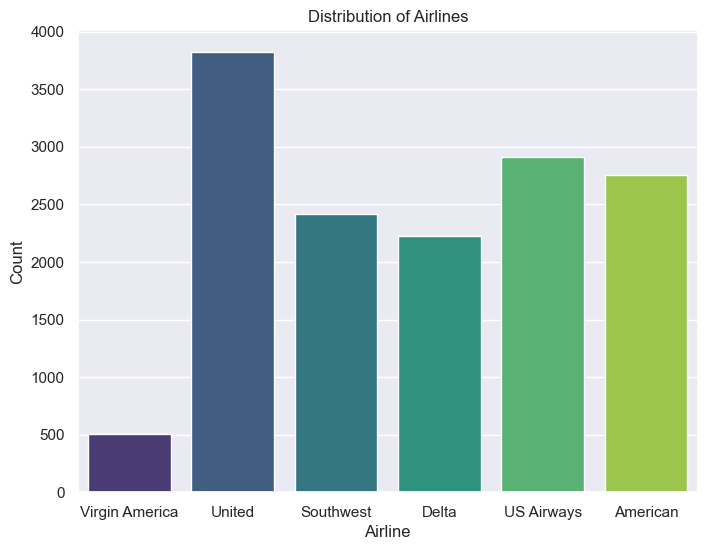

In [15]:
# Create a countplot
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
sns.countplot(data=data, x='airline', palette='viridis')

# Set labels and title
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Distribution of Airlines')

# Show the plot
plt.show()

**text:** The text content of the tweet is one of the most critical features for sentiment analysis. It contains the actual user-generated content that you can analyze for sentiment.

**airline:** The airline associated with the tweet is essential because sentiment can vary depending on the airline. It's a categorical feature that can be one-hot encoded for model training.

**negativereason:** If available, the reason for negative sentiment can provide valuable information for understanding why users are expressing negative sentiment towards an airline.

**user_timezone:** The timezone of the user who posted the tweet might be relevant because sentiment can vary by geographic region and time of day.

**retweet_count:** The number of retweets can be an indicator of the tweet's popularity or how strongly the sentiment is resonating with others. It can serve as a feature to capture engagement.

**tweet_location:** The location associated with the tweet might provide insights into regional sentiment variations.

**tweet_created:** The timestamp of when the tweet was created can be used for time-based analysis, such as sentiment trends over time.

## Data Preprocessing 

In [17]:
missing_vals = data.isnull().sum()
missing_vals

_unit_id                            0
_golden                             0
_unit_state                         0
_trusted_judgments                  0
_last_judgment_at                  56
airline_sentiment                   0
airline_sentiment:confidence        0
negativereason                   5462
negativereason:confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_id                            0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [32]:
# Selection of relevant features
selected_columns = ["_trusted_judgments", "_last_judgment_at",
                    "airline_sentiment", "airline_sentiment:confidence", "negativereason",
                    "negativereason:confidence", "airline", "retweet_count", "text", "tweet_created",
                    "tweet_location", "user_timezone"]

In [33]:
data = data[selected_columns]
data.head()

,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone
0,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,2/24/15 11:35,NaN,Eastern Time (US & Canada)
1,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,0,@VirginAmerica plus you've added commercials t...,2/24/15 11:15,NaN,Pacific Time (US & Canada)
2,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,2/24/15 11:15,Lets Play,Central Time (US & Canada)
3,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2/24/15 11:15,NaN,Pacific Time (US & Canada)
4,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2/24/15 11:14,NaN,Pacific Time (US & Canada)


In [34]:
data.isna().sum()

_trusted_judgments                 0
_last_judgment_at                 56
airline_sentiment                  0
airline_sentiment:confidence       0
negativereason                  5462
negativereason:confidence       4118
airline                            0
retweet_count                      0
text                               0
tweet_created                      0
tweet_location                  4733
user_timezone                   4820
dtype: int64

### Imputing Missing Values

    **_last_judgment_at:**
Since _last_judgment_at is a timestamp, we impute missing values with the mode (most frequent) timestamp to maintain the distribution of values. 

In [36]:
data['_last_judgment_at'].fillna(data['_last_judgment_at'].mode()[0], inplace=True)


    **negativereason and negativereason:confidence:**
These columns are related to the reason for negative sentiment. We impute missing values with a placeholder, "Not specified" to indicate that the reason was not provided:

In [39]:
data['negativereason'].fillna('Not specified', inplace=True)
data['negativereason:confidence'].fillna('Not specified', inplace=True)


    **tweet_location and user_timezone:**
These columns represent user-provided data and may be critical for the analysis. We can impute missing values with "Not Specific" or "Unknown" to indicate that the information was not provided:

In [41]:
data['tweet_location'].fillna('Not specified', inplace=True)
data['user_timezone'].fillna('Unknown', inplace=True)


In [42]:
data.isna().sum()

_trusted_judgments              0
_last_judgment_at               0
airline_sentiment               0
airline_sentiment:confidence    0
negativereason                  0
negativereason:confidence       0
airline                         0
retweet_count                   0
text                            0
tweet_created                   0
tweet_location                  0
user_timezone                   0
dtype: int64

## Exploratory Data Analysis (EDA):